#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32,3),activation='relu',padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [13]:
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [14]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [15]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [16]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [17]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 96s 3ms/step - loss: 0.3255 - accuracy: 0.9000 - val_loss: 0.3228 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 106s 3ms/step - loss: 0.3216 - accuracy: 0.9000 - val_loss: 0.3205 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 102s 3ms/step - loss: 0.3182 - accuracy: 0.9000 - val_loss: 0.3178 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 84s 2ms/step - loss: 0.3141 - accuracy: 0.9000 - val_loss: 0.3142 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 101s 3ms/step - loss: 0.3087 - accuracy: 0.9000 - val_loss: 0.3097 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 83s 2ms/step - loss: 0.3033 - accuracy: 0.9000 - val_loss: 0.3049 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [==============================] - 84s 2ms

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

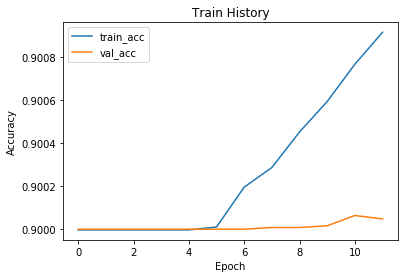

In [19]:
show_train_history('accuracy','val_accuracy')

In [20]:
model1 = Sequential()

#卷積層1

model1.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32,3),activation='relu',padding='same'))
model1.add(Dropout(rate=0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#卷積層2與池化層2

model1.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#建立神經網路(平坦層、隱藏層、輸出層)

model1.add(Flatten())
model1.add(Dropout(rate=0.25))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(rate=0.25))
model1.add(Dense(10, activation='softmax'))

#檢查model 的STACK
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [21]:
model1.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [22]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model1.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 102s 3ms/step - loss: 0.0904 - accuracy: 0.1101 - val_loss: 0.0899 - val_accuracy: 0.1423
Epoch 2/12
37500/37500 [==============================] - 91s 2ms/step - loss: 0.0901 - accuracy: 0.1198 - val_loss: 0.0897 - val_accuracy: 0.1490
Epoch 3/12
37500/37500 [==============================] - 75s 2ms/step - loss: 0.0899 - accuracy: 0.1249 - val_loss: 0.0897 - val_accuracy: 0.1615
Epoch 4/12
37500/37500 [==============================] - 107s 3ms/step - loss: 0.0897 - accuracy: 0.1295 - val_loss: 0.0896 - val_accuracy: 0.1748
Epoch 5/12
37500/37500 [==============================] - 85s 2ms/step - loss: 0.0896 - accuracy: 0.1359 - val_loss: 0.0895 - val_accuracy: 0.1814
Epoch 6/12
37500/37500 [==============================] - 85s 2ms/step - loss: 0.0895 - accuracy: 0.1395 - val_loss: 0.0894 - val_accuracy: 0.1893
Epoch 7/12
37500/37500 [==============================] - 92s 2ms/

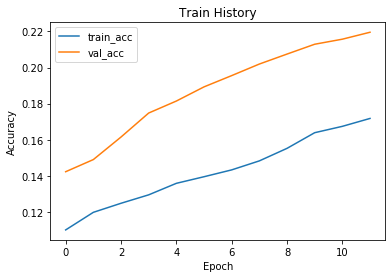

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

show_train_history('accuracy','val_accuracy')